**用熊貓輸入讀檔案（檔名要英文）**

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_csv('/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv')  

**合併資料**

In [64]:
df["Page_Name"] = df["Page_Name"].str.replace("三民惟新 陳柏惟","3Q 陳柏惟")

# 找出Comment_Count數最多的文章內容

In [15]:
print(max(df.Comment_Count)) 
print(df[(df['Comment_Count'] == max(df.Comment_Count) )]['Message'])

49462
1    凍蒜啦!!!
Name: Message, dtype: object


# 找出 All_Reaction_Count數最少的文章內容

In [16]:
print(min(df.All_Reaction_Count)) 
print(df[(df['All_Reaction_Count'] == min(df.All_Reaction_Count) )]['Message'])

0
11100                      現煮時！李中車隊東區掃街中～～～\n你的鼓勵 是我們最大的動力
11101     蔡英文 Tsai Ing-wen\n麻煩大家幫我轉傳，用不同的語言，把台灣人的聲音傳達給全世界。
11102    感謝粉絲依秀，特製私人應援T。\n大家都說我很兇，沒想到有天也能這麼粉紅。\n這件雖然非官方...
11103    江哥豐原Style～\n啟臣的豬血湯早餐任務出動！\n\n說到早餐，台北人常常是美而美\n但...
11104    大家…都在…看…朱隊友…眼神…\n\n#小編看到的是眼神死\n#MondayBlue\n#好...
11105    ⚾世界12強棒球賽，台灣首戰對決波多黎各，晚上六點半開打！⚾\n\n各位球迷朋友，讓我們一起...
11106    小孩子的微笑，是我前進的力量\n他們的快樂，是我們的責任\n下一代的未來，我們一起來改變\n...
11107    【反送中，撤惡法】高雄場\n\n雖然立法會宣布延審，但惡法再延也是惡法，惡霸依然是惡霸，這是...
11108                                                  NaN
11110    https://chinese.engadget.com/2019/03/20/tokyo-...
Name: Message, dtype: object


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 切割並新增欄位

In [18]:
print(df['Date'][0])

2020/01/12 01:17:08


In [19]:
df['Date'][0].split("/")[2].split(" ")[1].split(":")

['01', '17', '08']

In [20]:
df['Year'] = df['Date'].apply(lambda x : x.split("/")[0])

In [21]:
df['Month'] = df['Date'].apply(lambda x : x.split("/")[1])

In [22]:
df['Hour'] = df['Date'].apply(lambda x : x.split("/")[2].split(" ")[1].split(":")[0])

# 取出陳柏惟和顏寬恒文章中留言數>500的總讚數，並且畫成bar chart

  Page_Name             Page_ID  Link  All_Reaction_Count      總讚數  WOW_COUNT  \
1       顏寬恒   36201197552794200   0.0              253618   242974        366   
0    3Q 陳柏惟  235489469862907232   0.0             6923489  6134838      32528   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
1        4096        3198       2659          325          22515         8723   
0      285305      384233      36509        50076         813596       193369   

      created_time  
1   39380376372000  
0  685955788049000  
['Page_Name' 'Page_ID' 'Link' 'All_Reaction_Count' '總讚數' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comment_Count'
 'Share_Count' 'created_time']


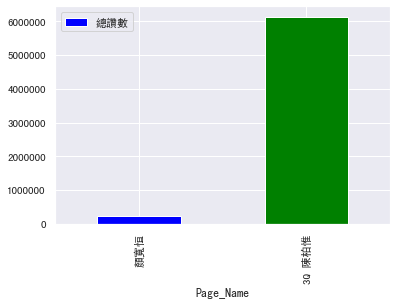

In [68]:
likedf = df[((df['Page_Name'] == '3Q 陳柏惟') | (df['Page_Name'] == '顏寬恒')) & (df['Comment_Count'] > 500)].groupby(by ='Page_Name').sum().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'LIKE_COUNT': '總讚數'})
print(likedf)
print(likedf.columns.values)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']       
likedf.plot.bar(x='Page_Name', y='總讚數', color=['blue','green'])

### 觀察：

從文章中留言數>500的總讚數，可以發現陳柏惟在臉書所獲取的總讚數是遠遠大於顏寬恒的，初步能得知兩人在競選策略的選擇屬性上有所差異，推測陳柏惟由於空降台中，若採用跑基層的宣傳方式可能無法勝過深耕在地多年的顏寬恒，加上陳柏惟是從網路媒體起家的，因此將資源投注在網路宣傳是他能夠與顏寬恒的選民受眾做出區別的方法

### 提問：

1. 找出陳柏惟較受歡迎的貼文內容為何（前十則），探討內容為何？
2. 各自的平均正負聲量？

**計算各候選人文章數**

     Page_Name  Date  Page_ID  Link  Type   文章數  LIKE_COUNT  WOW_COUNT  \
5          張渝江     1        1     0     1     1           1          1   
8       民眾黨謝文卿     3        3     0     3     3           3          3   
6          張睿倉     7        7     0     7     7           7          7   
12         翁美春    12       12     0    12    12          12         12   
2      台中市議員李中    15       15     0    15    15          15         15   
18         黃馨慧    34       34     0    34    34          34         34   
17         黃國書    45       45     0    45    45          45         45   
13    莊子富 Nico    72       72     0    72    72          72         72   
1     何欣純 台中阿純    80       80     0    80    80          80         80   
10         沈智慧   150      150     0   150   150         150        150   
3      堅持．張廖萬堅   162      162     0   162   162         162        162   
14  莊競程 有志者是競程   165      165     0   165   165         165        165   
16         顏寬恒   217      217     0   

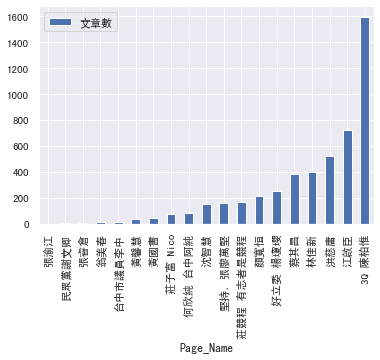

In [69]:
likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
print(likedf.columns.values)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

likedf.plot.bar(x='Page_Name', y='文章數')

# 取出陳柏惟與顏寬恒的發文type，並且畫成pie chart

**陳柏惟發文類型**

0    0.081448
1    0.552941
2    0.100905
3    0.264706
Name: Page_ID, dtype: float64


([<matplotlib.patches.Wedge at 0x1a1f005d50>,
 [Text(1.0641860605287325, 0.27840263751684746, 'link'),
  Text(-0.6900222745530533, 0.8566616955488502, 'photo'),
  Text(-0.43786683103125745, -1.009094959992688, 'status'),
  Text(0.7410654005249975, -0.81290963344318, 'video')],
 [Text(0.5804651239247631, 0.1518559841000986, '8.1%'),
  Text(-0.37637578611984723, 0.46727001575391824, '55.3%'),
  Text(-0.23883645328977676, -0.5504154327232843, '10.1%'),
  Text(0.40421749119545314, -0.4434052546053709, '26.5%')])

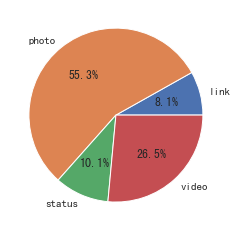

In [72]:
import pandas as pd
df = pd.read_csv("/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv")
df.head()
likedf =  df.groupby(['Page_Name','Type']).count().reset_index()
likedf =  likedf[likedf['Page_Name'] == '3Q 陳柏惟']
likedf['Page_ID'] = likedf['Page_ID'].apply(lambda x :x/likedf['Page_ID'].sum())
print(likedf['Page_ID'])
plt.pie(likedf['Page_ID'] , labels = likedf['Type'],autopct='%1.1f%%')

**顏寬恒發文類型**

82    0.121569
83    0.631373
84    0.007843
85    0.239216
Name: Page_ID, dtype: float64


([<matplotlib.patches.Wedge at 0x1a20e89e50>,
 [Text(1.02074619857881, 0.40997219184587214, 'link'),
  Text(-1.015618046423944, 0.42251625267912696, 'photo'),
  Text(0.04741734662637296, -1.098977522626789, 'status'),
  Text(0.8037185546065573, -0.751023624782301, 'video')],
 [Text(0.5567706537702599, 0.22362119555229387, '12.2%'),
  Text(-0.5539734798676057, 0.23046341055225103, '63.1%'),
  Text(0.025864007250748885, -0.5994422850691576, '0.8%'),
  Text(0.4383919388763039, -0.40964924988125506, '23.9%')])

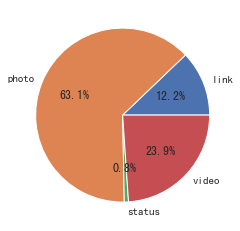

In [73]:
df.head()
likedf =  df.groupby(['Page_Name','Type']).count().reset_index()
likedf =  likedf[likedf['Page_Name'] == '顏寬恒']
likedf['Page_ID'] = likedf['Page_ID'].apply(lambda x :x/likedf['Page_ID'].sum())
print(likedf['Page_ID'])
plt.pie(likedf['Page_ID'] , labels = likedf['Type'],autopct='%1.1f%%')

### 觀察：
發現兩個候選人在發文的類型都以照片與影像居多，合理推測照片與影像較為臉書受眾喜愛，同時也能發現在發文類型的選擇上，陳柏惟較顏寬恒多出一類純文字的發文，推測可能是與選民互動的簡短貼文

### 提問：
1. 觀察照片與影像的貼文內容大多屬於何種類型，以及何種類型獲得的迴響最多？
2. 雖然都有分享連結，但兩者所分享的連結內容與迴響差異為何？
3. 分析3Q在文字發文上的內容為何？得到的迴響是否與照片影音類似？

# 請問陳柏惟與顏寬恒的按讚數和留言數有相似的趨勢嗎？

In [32]:
import pandas as pd
csv_file = "/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv"
df = pd.read_csv(csv_file)

df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/12 01:17:08,3Q 陳柏惟,540113462988316,NaN,photo,161773,150478,78,10670,506,34,7,9133,2454,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,NaN,NaN,1578763028000


**陳柏惟按讚留言趨勢**

In [33]:
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour
0,2020/01/12 01:17:08,3Q 陳柏惟,540113462988316,NaN,photo,161773,150478,78,10670,506,34,7,9133,2454,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,NaN,NaN,1578763028000,2020/01/12,01


In [34]:
#格式化時間
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-12 01:17:08,3Q 陳柏惟,540113462988316,NaN,photo,161773,150478,78,10670,506,...,7,9133,2454,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,NaN,NaN,1578763028000,2020/01/12,01,Sunday


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


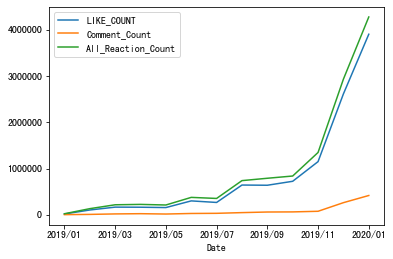

In [43]:
#篩選各政黨的資料
df_green = df[(df["Page_Name"] == "3Q 陳柏惟" )]

#一次抓很多筆
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_green

#比較按讚數和留言數的數量
like_green.plot(x='Date',y=['LIKE_COUNT','Comment_Count','All_Reaction_Count'])

**顏寬恒按讚留言趨勢**

In [100]:
import pandas as pd
csv_file = "/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv"
df = pd.read_csv(csv_file)

df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

#格式化時間
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-12 01:17:08,3Q 陳柏惟,540113462988316,NaN,photo,161773,150478,78,10670,506,...,7,9133,2454,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,NaN,NaN,1578763028000,2020/01/12,01,Sunday


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


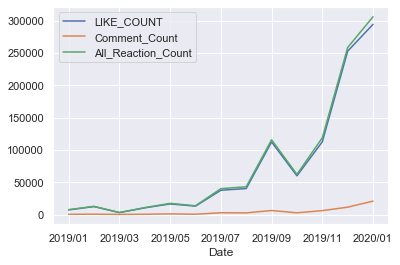

In [101]:
#篩選各政黨的資料
df_blue = df[(df["Page_Name"] == "顏寬恒" )]

#一次抓很多筆
like_blue = df_blue.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_blue

#比較按讚數和留言數的數量
like_blue.plot(x='Date',y=['LIKE_COUNT','Comment_Count','All_Reaction_Count'])

### 觀察：
能夠發現陳柏惟與顏寬恆在貼文所獲得的迴響成長不同，陳柏惟的按讚數至5月後呈現逐步地上升，但留言數並未跟上，至10月後按按讚數與留言數均大量上升；而顏寬恒則是在前期有波動的起伏，在9月起有一波按讚的高峰但不久便掉下來，一直到10月後讚數與留言才往上穩定攀升，從互動量可以推測10月應是選舉進入白熱化的階段，兩人的成長高峰都是至此開始的

### 提問：
1. 找出陳柏惟與顏寬恒於10月的大幅上升的節點上，比較發文類型並找出議題主軸？
2. 探討最熱門月份的貼文，留言的情緒屬性為何？
3. 找出顏寬恒於9月按讚數突然上升的貼文內容，並探討為何馬上下降？

# 取出候選人的總發文數，並且畫成pie chart

       Page_Name  Date  Page_ID  Link  Type   文章數  LIKE_COUNT  WOW_COUNT  \
20           賴建豪    27       27     0    27    27          27         27   
10  張睿倉180-大膽的起步    32       32     0    32    32          32         32   
4     台中立委候選人黃朝淵    97       97     0    97    97          97         97   
8       張渝江技師章魚哥   111      111     0   111   111         111        111   
2       何欣純 台中阿純   154      154     0   154   154         154        154   
1       三民惟新 陳柏惟   174      174     0   174   174         174        174   
12        民眾黨謝文卿   222      222     0   222   222         222        222   
22           黃國書   252      252     0   252   252         252        252   
21           顏寬恒   255      255     0   255   255         255        255   
9            張睿倉   268      268     0   268   268         268        268   
16           翁美春   299      299     0   299   299         299        299   
6        好立委 楊瓊瓔   368      368     0   368   368         368        368   
17      莊子富 

([<matplotlib.patches.Wedge at 0x1a1eb492d0>,
 [Text(1.0999679460491059, 0.008397479652358467, '賴建豪'),
  Text(1.0996748141338153, 0.026745152079566167, '張睿倉180-大膽的起步'),
  Text(1.097968114038126, 0.06682829158044509, '台中立委候選人黃朝淵'),
  Text(1.0921418715412239, 0.1312483616142801, '張渝江技師章魚哥'),
  Text(1.0792526296287699, 0.21263527797471735, '何欣純 台中阿純'),
  Text(1.0549230138171664, 0.31166879041525325, '三民惟新 陳柏惟'),
  Text(1.0134933826334591, 0.4275876089857948, '民眾黨謝文卿'),
  Text(0.9472702989451913, 0.5591770566969717, '黃國書'),
  Text(0.857668748413112, 0.6887701488853055, '顏寬恒'),
  Text(0.7468263962509463, 0.8076201668252376, '張睿倉'),
  Text(0.6083282319242515, 0.916480639317555, '翁美春'),
  Text(0.4257242160060897, 1.014277522133859, '好立委 楊瓊瓔'),
  Text(0.20484836544873117, 1.0807576727338017, '莊子富 Nico'),
  Text(-0.05580427200242178, 1.0985835804463309, '台中市議員李中'),
  Text(-0.34328902927906363, 1.0450610711229456, '蔡其昌'),
  Text(-0.6181399470625846, 0.9098917550156532, '沈智慧'),
  Text(-0.85630386

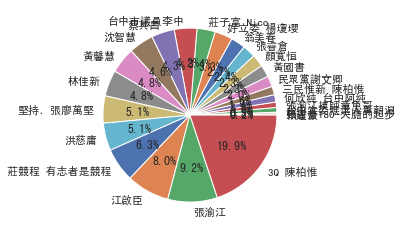

In [79]:
likedf = df.groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
plt.pie(likedf['文章數'] , labels = likedf['Page_Name'],autopct='%1.1f%%')

# 請畫出陳柏惟與顏寬恒每天的發文折線圖

**陳柏惟每天的發文折線圖**

In [83]:
import pandas as pd
csv_file = "/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv"
df = pd.read_csv(csv_file)

df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

#格式化時間
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-12 01:17:08,3Q 陳柏惟,540113462988316,NaN,photo,161773,150478,78,10670,506,...,7,9133,2454,【陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，99%的...,NaN,NaN,1578763028000,2020/01/12,01,Sunday


In [84]:
#把每個政黨每天發幾篇文算一次
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
#注意要加'reset_index(name='count')'才會變成dataframe
#df_post

#把國民黨單獨拿出來
df_gr = df_post[df_post['Page_Name']=='3Q 陳柏惟']
#df_tw = df_post[df_post['Page_Name']=='台灣基進']
#df_green = df_post[df_post['Page_Name']=='民主進步黨']

df_gr

,Page_Name,Post_Date,count
0,3Q 陳柏惟,2019/01/27,2
1,3Q 陳柏惟,2019/01/28,3
2,3Q 陳柏惟,2019/01/29,9
3,3Q 陳柏惟,2019/01/30,10
4,3Q 陳柏惟,2019/01/31,6
...,...,...,...
364,3Q 陳柏惟,2020/01/27,3
365,3Q 陳柏惟,2020/01/28,5
366,3Q 陳柏惟,2020/01/29,1
367,3Q 陳柏惟,2020/01/30,1


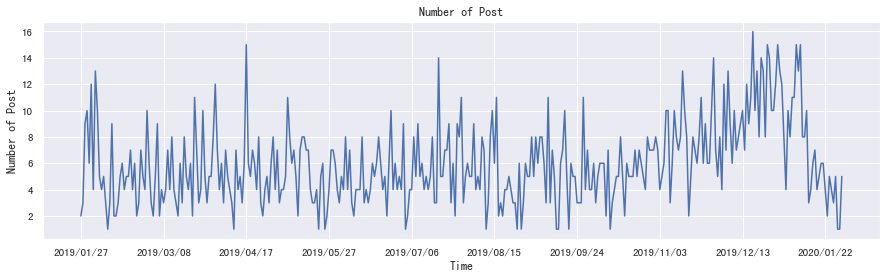

In [85]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

plt.plot(df_gr['Post_Date'],df_gr['count'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值
plt.show()

**顏寬恒每天的發文折線圖**

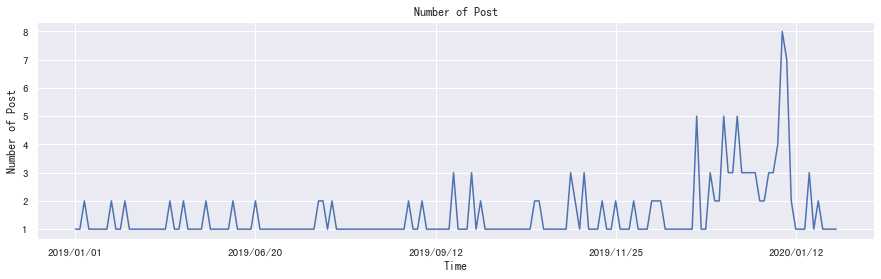

In [88]:
import pandas as pd
csv_file = "/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv"
df = pd.read_csv(csv_file)

df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

#格式化時間
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

#把每個政黨每天發幾篇文算一次
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
#注意要加'reset_index(name='count')'才會變成dataframe
#df_post

#把國民黨單獨拿出來
df_blue = df_post[df_post['Page_Name']=='顏寬恒']
#df_tw = df_post[df_post['Page_Name']=='台灣基進']
#df_green = df_post[df_post['Page_Name']=='民主進步黨']

df_blue

import matplotlib.ticker as ticker

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

plt.plot(df_blue['Post_Date'],df_blue['count'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值
plt.show()

### 觀察：
從兩人的發文曲線中可以得知，顏寬恆的發文頻率比起3Q少很多，能得知3Q都以網路宣傳為主，與前述所推測的競選策略選擇上不同吻合，而發文量的高峰都是在11月後，都是選舉後期的時間。

### 提問：
1. 
2. 
3. 

# 請問總體來看，最熱門的發文時段是哪時候？

**陳柏惟每個月的發文熱圖**

In [106]:
#選出3q的發文
df_gr = df[df['Page_Name']=='3Q 陳柏惟']

#算每星期每小時發了幾篇
df_post_gr = df_gr.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_gr

,Week,Hour,count
0,Friday,00,12
1,Friday,01,10
2,Friday,02,2
3,Friday,06,1
4,Friday,07,5
...,...,...,...
147,Wednesday,19,24
148,Wednesday,20,17
149,Wednesday,21,19
150,Wednesday,22,24


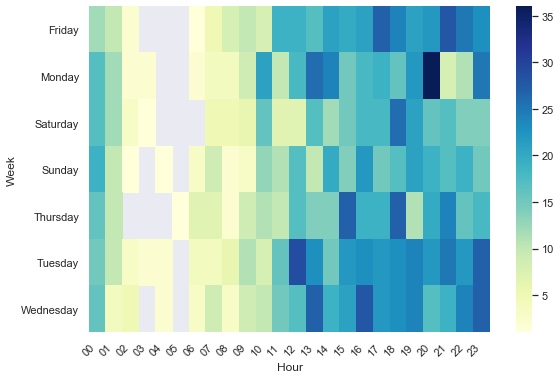

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

flights = df_post_gr.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

**顏寬恒每個月的發文熱圖**

In [108]:
import pandas as pd
csv_file = "/Users/wombat/Desktop/課程筆記/政治與資訊/教學資料/CSV 資料集/10802_2020_tclw.csv"
df = pd.read_csv(csv_file)

df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

#格式化時間
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

#選出水餃的發文
df_yan = df[df['Page_Name']=='顏寬恒']

#算每星期每小時發了幾篇
df_post_yan = df_yan.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_yan

,Week,Hour,count
0,Friday,07,1
1,Friday,08,1
2,Friday,09,2
3,Friday,10,4
4,Friday,11,1
...,...,...,...
95,Wednesday,16,5
96,Wednesday,18,1
97,Wednesday,19,1
98,Wednesday,20,2


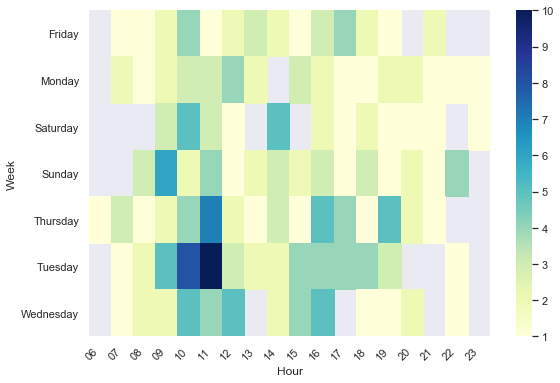

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

flights = df_post_yan.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

### 觀察：
從兩人的發文熱圖可以發現，3Q的發文時間主要在平日的下午12點至0點，而顏寬恒的發文時間則是集中在早上9點到12點與下午3到7點，以週二至週四最為密集。從兩人的熱度看來，可得知3Q是較為有系統地在發布貼文，可以從貼文發佈時間推測出其選民族群分佈，如3Q由於支持選民以年輕人為主，因此發布貼文的作息都較晚，甚至可能晚至半夜，相反的顏寬恒則因支持選民年齡較長，所以發文作息以日間為主

### 提問：
1. 探討熱度重疊的時段發文內容是否有所差異？
2. 分析3Q晚間7點後的貼文內容是否有因為年輕人作息不同，而導致內容也不同？
3. 承上，社群媒體主要的使用者是年輕人，那3Q所獲得的迴響是否因此而比較多？